## 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_boston

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.metrics import r2_score

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split

## 2 - Chargement des données du Boston Housing Dataset Boston

In [10]:
boston = load_boston()

## 3 - afficher le dataFrame Boston

In [11]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 3 - 1  Afficher la description des données en utilisant l'attribut DESCR

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 4 - Créer un tableau Numpy noté X contenant les (506, 13) données d'entrées

In [14]:
x = df.to_numpy()
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
print(type(x))

<class 'numpy.ndarray'>


## 5 - Créer un tableau Numpy noté y contenant les (506,) données de sortie

In [16]:
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
y = df['MEDV'].to_numpy()
y.shape

(506,)

In [18]:
df.shape

(506, 14)

In [19]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 6 - Calculer et afficher la matrice de corrélation sur les données d'entrées et de sorties 相関行列

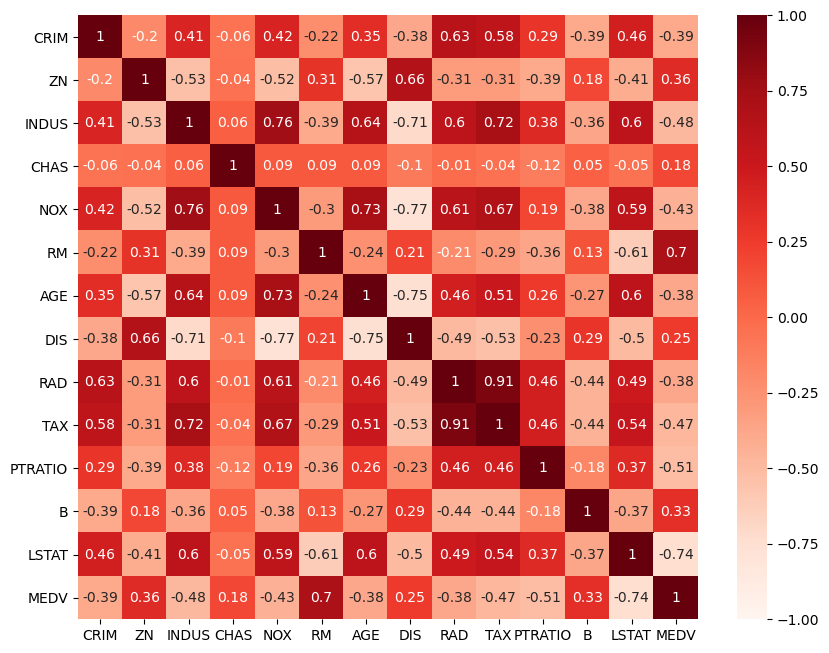

In [20]:
# corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
# Note: The correlation of a variable with itself is 1

plt.figure(1, figsize=(10, 8), dpi=100)
cor = df.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, center=0)
plt.show()

## 6 - Echantillonner les données entre un jeu de train et un jeu test  データをサンプリング

X_train, y_train contient 80 % des données initiales

X_test, y_test contient les autres 20 %

Astuce : utiliser la fonction train_test_split() de la librairie scikit-learn

In [21]:
# Si elle est mélangée, elle sera divisée de façon aléatoire à chaque exécution par défaut.
# Si l'argument random_state est spécifié pour fixer la graine aléatoire, elle sera toujours répartie de la même manière
X = x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(df.shape)

(506, 14)


In [23]:
print(X_train.shape)  # 506 - 404 = 102,  506 * 0.8 = 404.8

(404, 13)


In [24]:
print(X_test.shape)

(102, 13)


In [25]:
print(y_train.shape)

(404,)


In [26]:
print(y_test.shape)

(102,)


## 7 - Afficher la distribution des différents jeux de données (nombre d'exemples dans le jeu de données initial, dans le jeu de train et dans le jeu de test en fonction des valeurs de MDEV) sous forme d'histogrammes

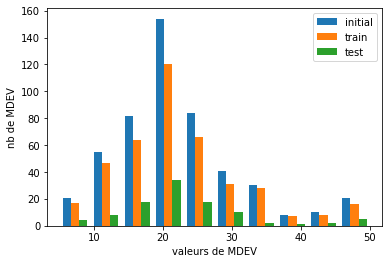

In [27]:
plt.xlabel("valeurs de MDEV")            
plt.ylabel("nb de MDEV")
plt.hist([y, y_train, y_test] , label=["initial","train", "test"])
plt.legend()
plt.show()

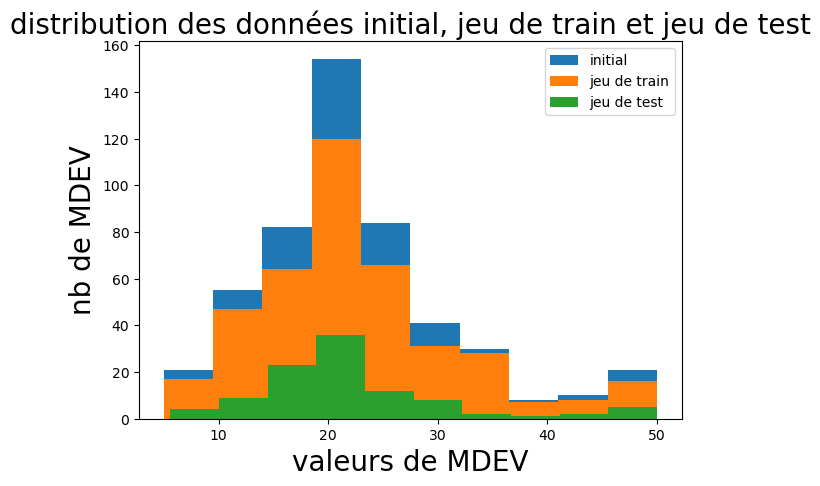

In [28]:
plt.figure(1, figsize=(7, 5), dpi=100)
plt.title("distribution des données initial, jeu de train et jeu de test", fontsize=20)  
plt.xlabel("valeurs de MDEV", fontsize=20)            
plt.ylabel("nb de MDEV", fontsize=20) 

plt.hist(y, bins=10, label="initial")
plt.hist(y_train, bins=10, label="jeu de train")
plt.hist(y_test, bins=10, label="jeu de test")
plt.legend()
plt.show()

Remarques : on constate qu'il y a des bons propotions de distributions entre train et test

## 8 - Entrainer le modèle de régression linéaire multiple sur le jeu de train

訓練を実行するには、fit() の引数に入力値 x と目標値 y を与えます。

In [29]:
model = LinearRegression()

In [30]:
# entrainement de modèle
model.fit(X_train, y_train)

LinearRegression()

## 9 - Evaluer les performances du modèle entrainé sur le jeu de train

In [31]:
# coefficient directeur de la droite calculée par le modèle 直進係数 a
model.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [32]:
# Afficher l'ordonnée à l'origine de la droite calculée par le modèle 直線の切片 b
model.intercept_

38.09169492630246

In [33]:
y_predict_train = model.predict(X_train)
print(f'predict de train: {y_predict_train[0]}')
print(f'target de train: {y_train[0]}')

predict de train: 32.55692655238984
target de train: 26.7


In [34]:
print(f'train score (coefficient de détermination R²): {model.score(X_train, y_train)}')

train score (coefficient de détermination R²): 0.7730135569264234


In [35]:
# erreur quadratique moyenne 平均二乗誤差
mse_train = mean_squared_error(y_train, y_predict_train)
print("l'erreur quadratique moyenne de train : ", mse_train)

l'erreur quadratique moyenne de train :  19.326470203585725


In [36]:
# racine de l'écart quadratique moyen : root-mean-square error
rms_train = mean_squared_error(y_train, y_predict_train, squared=False)
print("racine de l'écart quadratique moyen de train : ", rms_train)

racine de l'écart quadratique moyen de train :  4.396188144698282


## 10 - Evaluer les performances du modèle entrainé sur le jeu de test

In [37]:
y_predict_test = model.predict(X_test)
print(f'predict test: {y_predict_test[0]}')
print(f'target test: {y_test[0]}')

predict test: 24.889637772756732
target test: 22.6


In [38]:
print(f'test score (coefficient de détermination R²): {model.score(X_test, y_test)}')

test score (coefficient de détermination R²): 0.5892223849182507


In [39]:
# erreur quadratique moyenne 平均二乗誤差
mse_test = mean_squared_error(y_test, y_predict_test)
print("l'erreur quadratique moyenne de test : ", mse_test)

l'erreur quadratique moyenne de test :  33.44897999767653


In [40]:
# racine de l'écart quadratique moyen : root-mean-square error
rms_test = mean_squared_error(y_test, y_predict_test, squared=False)
print("racine de l'écart quadratique moyen de test : ", rms_test)

racine de l'écart quadratique moyen de test :  5.783509315085135


Remarques : 
    racine de l'écart quadratique moyen de train :  4.396188144698282
    racine de l'écart quadratique moyen de test :  5.783509315085135
    
    rms de train est plus petit que celui de test => normal
    rms de test n'est pas loin de celui de train => pas mal

inference avec predict()

In [41]:
model.predict(X_test[:102])

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [42]:
y_test[:102]

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

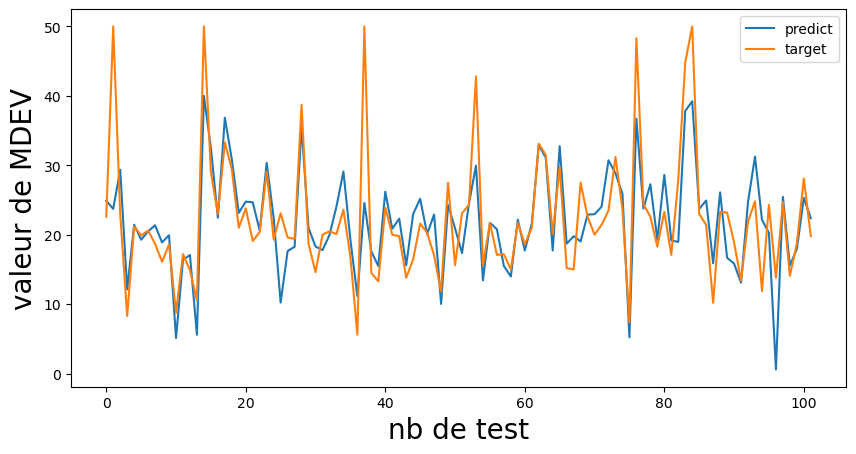

In [43]:
plt.figure(1, figsize=(10, 5), dpi=100)
plt.xlabel("nb de test", fontsize=20)            
plt.ylabel("valeur de MDEV", fontsize=20) 
plt.plot(model.predict(X_test[:102]), label="predict")
plt.plot(y_test[:102], label="target")
plt.legend()

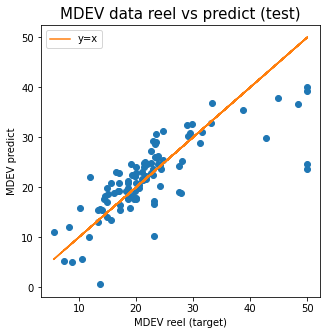

In [44]:
plt.figure(figsize=(5, 5))
plt.plot(y_test, y_predict_test, 'o')
plt.plot(y_test, y_test, label='y=x')
plt.title("MDEV data reel vs predict (test)", fontsize=15)
plt.xlabel("MDEV reel (target)")            
plt.ylabel("MDEV predict")
plt.legend()
plt.show()

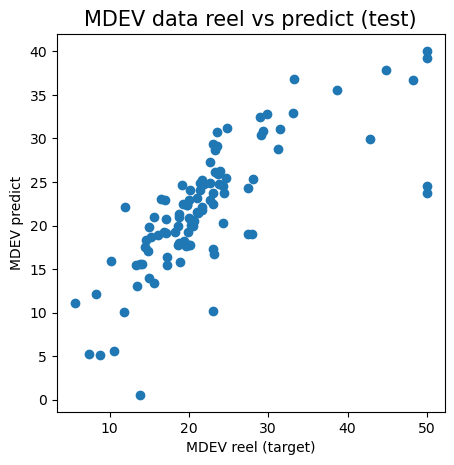

In [45]:
plt.figure(1, figsize=(5, 5), dpi=100)
plt.title("MDEV data reel vs predict (test)", fontsize=15)
plt.xlabel("MDEV reel (target)")            
plt.ylabel("MDEV predict") 
plt.scatter(y_test, y_predict_test) # y_predict = model.predict(x_test)

# Remarques : On peut constater que les MDEV reel entre 5 et 40 ont à peu près les valeurs MDEV predict pour les donnée test.

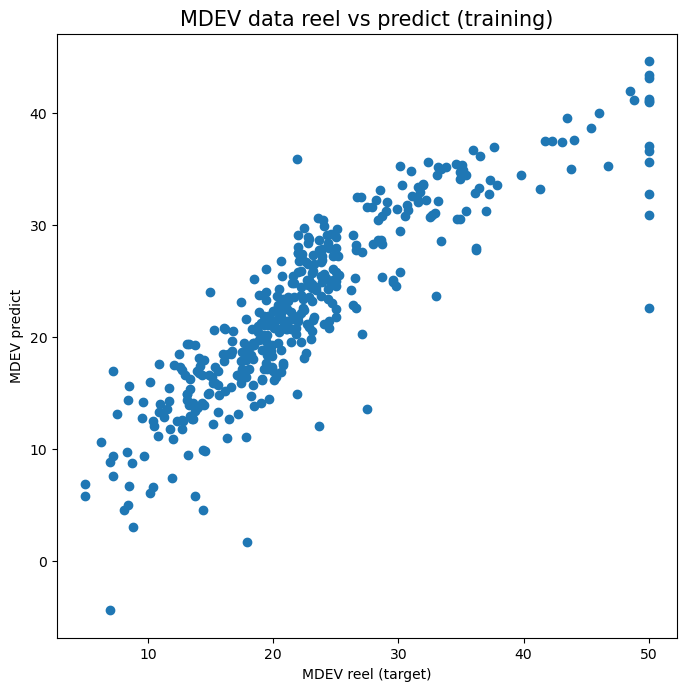

In [51]:
plt.figure(1, figsize=(8, 8), dpi=100)
plt.title("MDEV data reel vs predict (training)", fontsize=15)
plt.xlabel("MDEV reel (target)")            
plt.ylabel("MDEV predict") 
plt.scatter(y_train, model.predict(X_train))

# Remarques : On peut constater que les MDEV reel entre 5 et 40 ont à peu près les valeurs MDEV predict pour les donnée train.

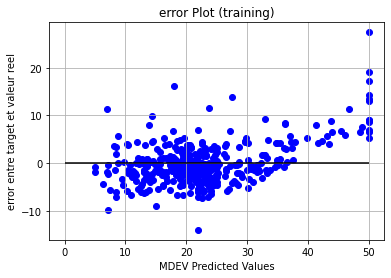

In [52]:
# error entre target et valeur reel pour les donnée train
plt.scatter(y_train, y_train - model.predict(X_train), color = 'blue')  
plt.hlines(y = 0, xmin = 0, xmax = 50, color = 'black') 
plt.title('error Plot (training)')
plt.xlabel('MDEV Predicted Values') 
plt.ylabel('error entre target et valeur reel')
plt.grid()

plt.show() 

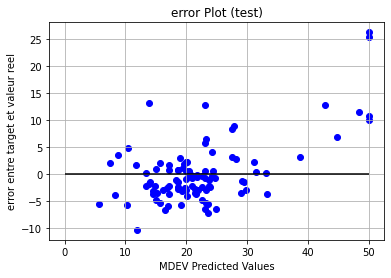

In [53]:
# error entre target et valeur reel pour les donnée test
plt.scatter(y_test, y_test - model.predict(X_test), color = 'blue')  
plt.hlines(y = 0, xmin = 0, xmax = 50, color = 'black') 
plt.title('error Plot (test)')
plt.xlabel('MDEV Predicted Values') 
plt.ylabel('error entre target et valeur reel')
plt.grid()

plt.show() 

On peut constater que les données predict entre 5 et 40 peuvent predirent assez bien (errors sont moins +-5) sur train et test

## 11 - conclure

### 1. On peut constater que le modèle peut prédire assez bien des valeurs MDEV entre 5 et 40  sur train et test

    On peut constater que les MDEV predit entre 5 et 35 ont à peu près les valeurs MDEV reel

### 2. On peut predire les MDEV mieux avec 13 caractéristiques d'entrées qu'un seul caractéristique d'entrée

    RMS pour RM : 6.6
    
    RMS train pour 13 caractéristique : 4.4
    
    RMS test pour 13 caractéristique : 5.8

### Reference

train score (coefficient de détermination): 0.7730135569264234

test score (coefficient de détermination): 0.5892223849182507

racine de l'écart quadratique moyen de train : 4.396188144698282 

racine de l'écart quadratique moyen de test : 5.783509315085135

rms de train est plus petit que celui de test => normal

rms de test n'est pas loin de celui de train => pas mal